In [5]:
from transfer_learning import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib as mpl

mpl.rcParams.update(mpl.rcParamsDefault)

rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
mpl.rcParams['savefig.dpi'] = 1200
mpl.rcParams['text.usetex'] = True  # not really needed

In [23]:
# problem setup
p = 200

# generate source task data
beta_source = np.random.normal(0, 1, p)
num_samples_source = 400
sigma_source = 0.1
X_source, y_source = generate_LR_task_data(num_samples_source, p, beta_source, sigma_source)

# generate target task data
shift_scale = 0.1
shift = np.random.normal(0, shift_scale, p)
beta_target = beta_source + shift
num_samples_target = 200
sigma_target = 0.1
X_target, y_target = generate_LR_task_data(num_samples_target, p, beta_target, sigma_target)

# generate target target test data
num_samples_target_test = 1000
X_target_test, y_target_test = generate_LR_task_data(num_samples_target_test, p, beta_target, 0.0)

In [34]:
# Now vary shift scale and see how it affects test_mse
shift_scales = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5]
hps_results = {}
ols_results = {}

for scale in shift_scales:
    shift = np.random.normal(0, scale, p)
    beta_target = beta_source + shift
    X_target, y_target = generate_LR_task_data(num_samples_target, p, beta_target, sigma_target)

    X_target_test, y_target_test = generate_LR_task_data(num_samples_target_test, p, beta_target, 0.0)
    tests = X_target_test, y_target_test

    hps_inputs = X_source, y_source, X_target, y_target
    hps_test_mse = hps_estimator(hps_inputs, tests)
    hps_results[scale] = hps_test_mse

    ols_inputs = X_target, y_target
    ols_test_mse = ols_estimator(ols_inputs, tests)
    ols_results[scale] = ols_test_mse

HPS test MSE on target test data: 0.009716132102152426
OLS test MSE on target test data: 3.78999299998972
HPS test MSE on target test data: 0.646307206845477
OLS test MSE on target test data: 1.5899431233782395
HPS test MSE on target test data: 2.942475214932427
OLS test MSE on target test data: 1.0773128100351037
HPS test MSE on target test data: 5.350713149649048
OLS test MSE on target test data: 2.3121969997704466
HPS test MSE on target test data: 9.97500537678655
OLS test MSE on target test data: 2.895104587499142
HPS test MSE on target test data: 13.853780617302897
OLS test MSE on target test data: 11.517196826388012


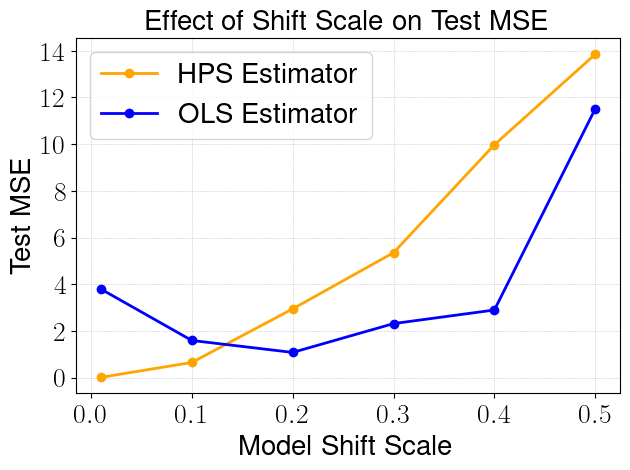

In [ ]:
# Now draw a plot of shift_scale vs test_mse

scales = list(hps_results.keys())

hps_mses = [hps_results[scale] for scale in scales]
ols_mses = [ols_results[scale] for scale in scales]

plt.figure(figsize=(8,6))
plt.plot(scales, hps_mses, lw = 2, marker='o', c='orange', label='HPS Estimator')
plt.plot(scales, ols_mses, lw = 2, marker='o', c='blue', label='OLS Estimator')

plt.xlabel("Model Shift Scale", fontsize=20)
plt.ylabel("Test MSE", fontsize=20)
plt.title("Effect of Shift Scale on Test MSE", fontsize=20)
plt.legend(fontsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(lw=0.5, ls=":")
plt.tight_layout()
plot_name = f"../figures/model_shift.pdf"
plt.savefig(plot_name, bbox_inches='tight', format="pdf", dpi=1200)

plt.show()
plt.close()

In [51]:
# Next we set the model shift scale small, and instead vary the covariance matrix of the feature vectors

# In the source task, we set the condition matrix to be a rank-r matrix with trace equal to p

covariate_shift_scales = [int(p / 20) * i for i in range(1, 21)]
hps_results = []
ols_results = []

model_shift = np.random.normal(0, 0.100, p)
X_target, y_target = generate_LR_task_data(num_samples_target, p, beta_source + model_shift, sigma_target)
X_target_test, y_target_test = generate_LR_task_data(num_samples_target_test, p, beta_source + model_shift, 0.0)
tests = X_target_test, y_target_test

for r in covariate_shift_scales:
    condition_matrix = generate_condition_matrix(p, r)
    X_source, y_source = generate_LR_conditioned_task_data(num_samples_source, p, beta_source, sigma_source, condition_matrix)

    hps_inputs = X_source, y_source, X_target, y_target
    hps_test_mse = hps_estimator(hps_inputs, tests)
    hps_results.append(hps_test_mse)

    ols_inputs = X_target, y_target
    ols_test_mse = ols_estimator(ols_inputs, tests)
    ols_results.append(ols_test_mse)

HPS test MSE on target test data: 5.221675812998577
OLS test MSE on target test data: 1.539700876058444
HPS test MSE on target test data: 2.9355696965160525
OLS test MSE on target test data: 1.539700876058444
HPS test MSE on target test data: 1.1552783708572278
OLS test MSE on target test data: 1.539700876058444
HPS test MSE on target test data: 1.8649917843617463
OLS test MSE on target test data: 1.539700876058444
HPS test MSE on target test data: 2.533893498906257
OLS test MSE on target test data: 1.539700876058444
HPS test MSE on target test data: 2.2987925212769813
OLS test MSE on target test data: 1.539700876058444
HPS test MSE on target test data: 2.094787354375701
OLS test MSE on target test data: 1.539700876058444
HPS test MSE on target test data: 2.04551653887766
OLS test MSE on target test data: 1.539700876058444
HPS test MSE on target test data: 1.9755725561638868
OLS test MSE on target test data: 1.539700876058444
HPS test MSE on target test data: 1.76455099219382
OLS test 

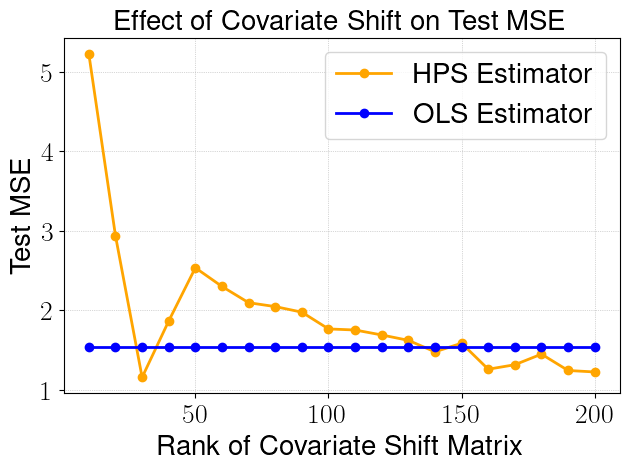

In [58]:
#plt.figure(figsize=(8,6))

plt.plot(covariate_shift_scales, hps_results, lw = 2, marker='o', c='orange', label='HPS Estimator')
plt.plot(covariate_shift_scales, ols_results, lw = 2, marker='o', c='blue', label='OLS Estimator')
plt.xlabel("Rank of Covariate Shift Matrix", fontsize=20)
plt.ylabel("Test MSE", fontsize=20)
plt.title("Effect of Covariate Shift on Test MSE", fontsize=20)
plt.legend(fontsize=20)

plt.xticks([50, 100, 150, 200], fontsize=20)
plt.yticks([1.0, 2.0, 3.0, 4.0, 5.0], fontsize=20)
plt.grid(lw=0.5, ls=":")
plt.tight_layout()
plot_name = f"../figures/covariate_shift.pdf"
plt.savefig(plot_name, bbox_inches='tight', format="pdf", dpi=1200)

plt.show()
plt.close()

In [8]:
hps_results

[np.float64(0.4136894826090153),
 np.float64(0.9298174264060315),
 np.float64(0.7797268763334207),
 np.float64(0.2689569312981782),
 np.float64(0.3712213784369816),
 np.float64(0.769328197531167),
 np.float64(0.23991461955131083),
 np.float64(0.35124240228447),
 np.float64(0.3149962501060672),
 np.float64(0.19217652942506103),
 np.float64(0.35172273816354016),
 np.float64(0.22352487615347683),
 np.float64(0.4545859894715178),
 np.float64(0.4813248850147724),
 np.float64(0.22258226570307227),
 np.float64(0.23891720585445603),
 np.float64(0.235989720944234),
 np.float64(0.26776525310102006),
 np.float64(0.22115566779565113),
 np.float64(0.1330194351148288),
 np.float64(0.2421371560350491),
 np.float64(0.33012432388238516),
 np.float64(0.27133157576737926),
 np.float64(0.3118795172917876),
 np.float64(0.2539679361388943),
 np.float64(0.18180551000821835),
 np.float64(0.26878639695108253),
 np.float64(0.2925936557280291),
 np.float64(0.21583822483698112),
 np.float64(0.17016207892941052),


In [9]:
p

100